<a href="https://colab.research.google.com/github/Hamid-GHub/Introduction-to-Deep-Learning-Course/blob/main/Introduction_to_Deep_Learning_Week_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**# **Histopathologic Cancer Detection Using Convolutional Neural Network**

In this project, a dataset of pathology scans for patients is studied. Each image in the dataset can either represent cancer or not.

A deep neural network with convolutional and fully connected layers is used to detect cancer in a new unseen image.

**Importing necessary libraries adn downloading the dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imread
from matplotlib.pyplot import figure
import os,pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam

train_path = "/content/histopathologic-cancer-detection/train"
test_path =  "/content/histopathologic-cancer-detection/test"
dataset_path = "/content/histopathologic-cancer-detection/"

In [4]:
tf.__version__

'2.9.2'

In [3]:
! pip install -q kaggle
from google.colab import files

##files.upload()
%cd /content

! rm -rf ~/.kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! rm -rf histopathologic-cancer-detection.zip
! kaggle competitions download -c histopathologic-cancer-detection

! rm -rf histopathologic-cancer-detection
! unzip -q histopathologic-cancer-detection.zip  -d histopathologic-cancer-detection

/content
100% 6.29G/6.31G [00:47<00:00, 198MB/s]
100% 6.31G/6.31G [00:47<00:00, 144MB/s]


## **Brief Description of the Problem and Data**

The dataset for this projects includes small pathology images of patients. Each image as training instance corresponds to a binary label. The label 1 means the presence of at least one tumor tissue and label 0 means otherwise.

The problem to be addrssed in this project is to classify new unseen images of patients to either category of tumor or no tumor. Therefore, a binary classification problem is studied in this project

Each image in the dataset has 96*96 pixels and there are 220025 images in the training set. On the other hand, there are 57458 in the test set.

## **Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data**

In this section, the dataset for the project explored with the help of some visualizations and summary statistics.

The first visualization depicts the distribution of the class among observations in the training set.



In [5]:
train_labels = pd.read_csv(os.path.join(dataset_path,'train_labels.csv' ) )
train_labels.head()
train_labels['label'] = train_labels['label'].astype('str')
train_labels['id'] = train_labels['id'].apply(lambda filename: filename + '.tif')



Text(0.5, 1.0, 'Distribution of Labels Among Observations')

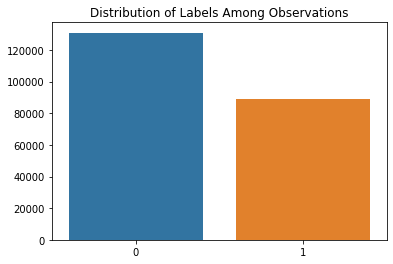

In [6]:
import seaborn as sns
label_dist =train_labels['label'].value_counts()
label_dist.values
ax = sns.barplot(x=label_dist.index.tolist(), y=label_dist.values.tolist())
ax.set_title('Distribution of Labels Among Observations')


As it is observed from the bar plot above, there is a class imbalance in the training set. That is the number of cancer images are more than the number of non-cancer images.

The next plot show ten(10) random images from the training set with 0 label.

In [7]:
zeros = train_labels[train_labels.label=='0']
ones =  train_labels[train_labels.label=='1']

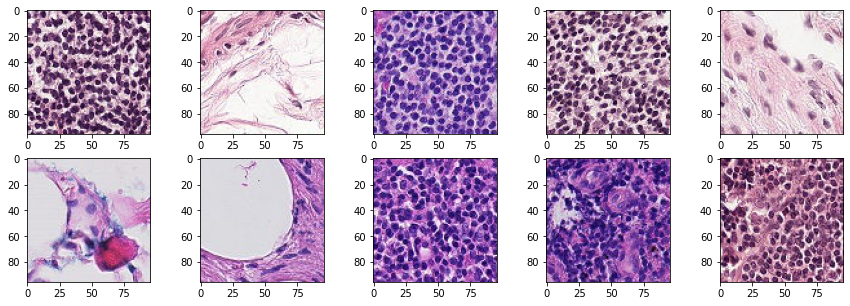

In [8]:

random_indices = np.random.randint(0,zeros.shape[0],10)

fig, axes = plt.subplots(2,5, figsize = (15,5))
# figure(figsize=(40,30))

for number, idx in enumerate(random_indices):
     filename = zeros.iloc[idx, 0]
     image = plt.imread(train_path+'/'+ filename)
     axes[number//5,number%5].imshow(image)
 

The next plot show ten(10) random images from the training set with 1 label.

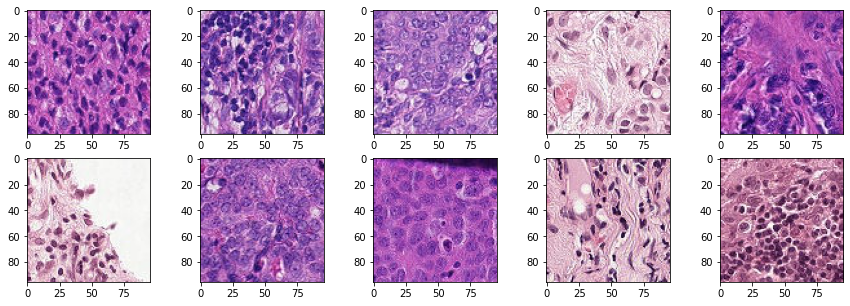

In [9]:
random_indices = np.random.randint(0,ones.shape[0],10)

fig, axes = plt.subplots(2,5, figsize = (15,5))
# figure(figsize=(40,30))

for number, idx in enumerate(random_indices):
     filename = ones.iloc[idx, 0]
     image = plt.imread(train_path+'/'+ filename)
     axes[number//5,number%5].imshow(image)
 

## **Model Architecture**
This section describes the architecture usef for the deep neural network of cancer detection. The architecture includes the number of convolution and dense layers and the number of neuron in each layer. The type of activation function in each layer is also specified.

### **Model 1: The Basic Model**

In [10]:
batch_size = 8
learning_rate = 0.001
epoch = 4


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import image_dataset_from_directory
datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)
training = datagen.flow_from_dataframe(
    dataframe = train_labels,
    directory = train_path, 
    x_col ='id', 
    y_col='label',
    subset ='training',
    batch_size = batch_size,
    target_size = (96,96),
    seed =123,
    class_mode = 'binary'
    )


validation =datagen.flow_from_dataframe(
    dataframe = train_labels,
    directory = train_path, 
    x_col ='id', 
    y_col='label',
    subset ='validation',
    batch_size = batch_size,
    target_size = (96,96),
    seed =123,
    class_mode = 'binary'
    )

Found 176020 validated image filenames belonging to 2 classes.
Found 44005 validated image filenames belonging to 2 classes.


In [ ]:
model_1 = Sequential()
model_1.add(Conv2D(filters = 16, kernel_size =(3,3), input_shape = ( 96,96,3),activation = 'relu'))
model_1.add(Conv2D(filters =16, kernel_size =(3,3),activation = 'relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Flatten())
model_1.add(Dense(1,activation ='sigmoid' ))
model_1.compile(optimizer = Adam(learning_rate= learning_rate ), loss = 'binary_crossentropy', metrics =['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 1)                 33857     
                                                                 
Total params: 36,625
Trainable params: 36,625
Non-trainable params: 0
____________________________________________________

In [ ]:
model_1_history = model_1.fit(training, epochs = epoch , validation_data = validation)


Epoch 1/4
22003/22003 [==============================] - 368s 16ms/step - loss: 0.6153 - accuracy: 0.5953 - val_loss: 0.6105 - val_accuracy: 0.6262
Epoch 2/4
22003/22003 [==============================] - 299s 14ms/step - loss: 0.5970 - accuracy: 0.6374 - val_loss: 0.5859 - val_accuracy: 0.6815
Epoch 3/4
22003/22003 [==============================] - 287s 13ms/step - loss: 0.5467 - accuracy: 0.7022 - val_loss: 0.4546 - val_accuracy: 0.7983
Epoch 4/4
22003/22003 [==============================] - 286s 13ms/step - loss: 0.4120 - accuracy: 0.8163 - val_loss: 0.4118 - val_accuracy: 0.8122


In [ ]:
model_1.save('/content/drive/MyDrive/saved_models_Dec_2022/model1.h5')
pickle.dump(model_1_history.history, open('/content/drive/MyDrive/saved_models_Dec_2022/model_1_history','wb'))

In [12]:
model_1_hist = pickle.load(open('/content/drive/MyDrive/saved_models_Dec_2022/model_1_history','rb'))

### **Model 2: The Deeper Model**

**The architecture for Model 2;**


In [13]:
batch_size = 16
learning_rate = 0.001
epoch = 4

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(filters = 16, kernel_size =(3,3), input_shape = ( 96,96,3),activation = 'relu'))
model_2.add(Conv2D(filters =16, kernel_size =(3,3),activation = 'relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Conv2D(filters = 16, kernel_size =(3,3), input_shape = ( 96,96,3),activation = 'relu'))
model_2.add(Conv2D(filters =16, kernel_size =(3,3),activation = 'relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Flatten())
model_2.add(Dense(1,activation ='sigmoid' ))
model_2.compile(optimizer = Adam(learning_rate= learning_rate ), loss = 'binary_crossentropy', metrics =['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 conv2d_3 (Conv2D)           (None, 92, 92, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 44, 44, 16)        2320      
                                                                 
 conv2d_5 (Conv2D)           (None, 42, 42, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 21, 21, 16)       0         
 2D)                                                  

In [ ]:
model_2_history = model_2.fit(training, epochs = epoch , validation_data = validation)

Epoch 1/4
22003/22003 [==============================] - 300s 14ms/step - loss: 0.5234 - accuracy: 0.7086 - val_loss: 0.4555 - val_accuracy: 0.7821
Epoch 2/4
22003/22003 [==============================] - 299s 14ms/step - loss: 0.3720 - accuracy: 0.8371 - val_loss: 0.3414 - val_accuracy: 0.8513
Epoch 3/4
22003/22003 [==============================] - 297s 13ms/step - loss: 0.3418 - accuracy: 0.8538 - val_loss: 0.3332 - val_accuracy: 0.8595
Epoch 4/4
22003/22003 [==============================] - 297s 13ms/step - loss: 0.3302 - accuracy: 0.8598 - val_loss: 0.3157 - val_accuracy: 0.8660


In [ ]:
model_2.save('/content/drive/MyDrive/saved_models_Dec_2022/model2.h5')
pickle.dump(model_2_history.history, open('/content/drive/MyDrive/saved_models_Dec_2022/model_2_history','wb'))

In [14]:
model_2_hist = pickle.load(open('/content/drive/MyDrive/saved_models_Dec_2022/model_2_history','rb'))

**Model 3.**

In [ ]:
batch_size = 8
learning_rate = 0.001
epoch = 5

In [ ]:
model_3 = Sequential()
model_3.add(Conv2D(filters = 128, kernel_size =(3,3), input_shape = ( 96,96,3),activation = 'relu'))
model_3.add(Conv2D(filters = 128, kernel_size =(3,3),activation = 'relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Conv2D(filters = 64, kernel_size =(3,3), input_shape = ( 96,96,3),activation = 'relu'))
model_3.add(Conv2D(filters = 64, kernel_size =(3,3),activation = 'relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))


model_3.add(Flatten())
model_3.add(Dense(1,activation ='sigmoid' ))
model_3.compile(optimizer = Adam(learning_rate= learning_rate ), loss = 'binary_crossentropy', metrics =['accuracy'])
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 94, 94, 128)       3584      
                                                                 
 conv2d_23 (Conv2D)          (None, 92, 92, 128)       147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 46, 46, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 44, 44, 64)        73792     
                                                                 
 conv2d_25 (Conv2D)          (None, 42, 42, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 21, 21, 64)       0         
 g2D)                                                 

In [ ]:
model_3_history = model_3.fit(training, epochs = epoch , validation_data = validation)



Epoch 1/5
5501/5501 [==============================] - 382s 69ms/step - loss: 0.4338 - accuracy: 0.8035 - val_loss: 0.3519 - val_accuracy: 0.8499
Epoch 2/5
5501/5501 [==============================] - 385s 70ms/step - loss: 0.3396 - accuracy: 0.8567 - val_loss: 0.3002 - val_accuracy: 0.8730
Epoch 3/5
5501/5501 [==============================] - 384s 70ms/step - loss: 0.2496 - accuracy: 0.8997 - val_loss: 0.2600 - val_accuracy: 0.8941
Epoch 5/5
5501/5501 [==============================] - 384s 70ms/step - loss: 0.2276 - accuracy: 0.9100 - val_loss: 0.2423 - val_accuracy: 0.9045


In [ ]:
model_3.save('/content/drive/MyDrive/saved_models_Dec_2022/model3.h5')
pickle.dump(model_3_history.history, open('/content/drive/MyDrive/saved_models_Dec_2022/model_3_history','wb'))

In [15]:
model_3 = load_model('/content/drive/MyDrive/saved_models_Dec_2022/model3.h5')

In [16]:
model_3_hist = pickle.load(open('/content/drive/MyDrive/saved_models_Dec_2022/model_3_history','rb'))

In [17]:
sample_submission = pd.read_csv(os.path.join(dataset_path,'sample_submission.csv'))
sample_submission['label'] = sample_submission['label'].astype('str')
sample_submission['id'] = sample_submission['id'].apply(lambda filename: filename + '.tif')

In [18]:
sample_submission.head()

,id,label
0,0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5.tif,0
1,95596b92e5066c5c52466c90b69ff089b39f2737.tif,0
2,248e6738860e2ebcf6258cdc1f32f299e0c76914.tif,0
3,2c35657e312966e9294eac6841726ff3a748febf.tif,0
4,145782eb7caa1c516acbe2eda34d9a3f31c41fd6.tif,0


In [27]:
datagen_test = ImageDataGenerator(rescale = 1./255)
test= datagen_test.flow_from_dataframe(
    dataframe = sample_submission,
    color_mode ='rgb',
    directory = test_path, 
    x_col ='id', 
    batch_size = 8,
    target_size = (96,96),
    seed =123,
    class_mode = None
    )

Found 57458 validated image filenames.


In [28]:
y_pred = model_3.predict(test)

7183/7183 [==============================] - 2352s 327ms/step


In [50]:

sample_submission['label']= (y_pred.flatten()>=0.5).astype('int64')
sample_submission['id'] = sample_submission['id'].apply(lambda filename: filename.split('.')[0])
sample_submission.head()
sample_submission.to_csv("/content/drive/MyDrive/saved_models_Dec_2022/submission.csv", index=False)

## **Results and Analysis**

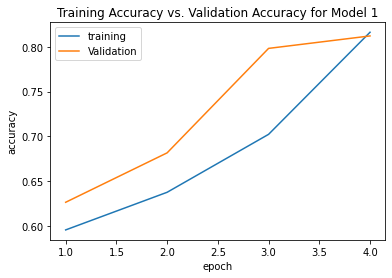

In [14]:
sns.lineplot(x= range(1,5) ,y= model_1_hist['accuracy'],label = 'training')
ax = sns.lineplot(x= range(1,5) ,y= model_1_hist['val_accuracy'],label ='Validation')
ax.set(xlabel='epoch', ylabel ='accuracy', title = 'Training Accuracy vs. Validation Accuracy for Model 1')

plt.show()

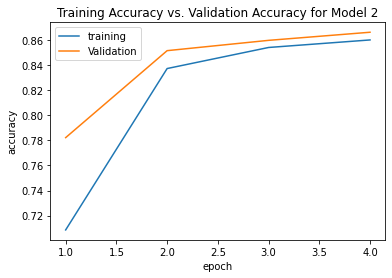

In [15]:
sns.lineplot(x= range(1,5) ,y= model_2_hist['accuracy'],label = 'training')
ax = sns.lineplot(x= range(1,5) ,y= model_2_hist['val_accuracy'],label ='Validation')
ax.set(xlabel='epoch', ylabel ='accuracy', title = 'Training Accuracy vs. Validation Accuracy for Model 2')

plt.show()

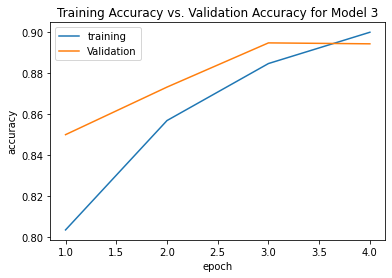

In [16]:
sns.lineplot(x= range(1,5) ,y= model_3_hist['accuracy'][:-1],label = 'training')
ax = sns.lineplot(x= range(1,5) ,y= model_3_hist['val_accuracy'][:-1],label ='Validation')
ax.set(xlabel='epoch', ylabel ='accuracy', title = 'Training Accuracy vs. Validation Accuracy for Model 3')

plt.show()

## **Conclusion**

In this project a dataset of pathology scans was studied. The goal was to build a classifier to predict whether or not the image represents the cancer. Three models were built. A basic model, a deeper model and a deeper model with better hyperparameters. Among the three models, the third model performed better in terms of accuracy.